In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
plt.style.use('seaborn')
%matplotlib inline

In [19]:
d_set = pd.read_csv('data/190114_pullup.csv')
d_set = d_set.set_index('Player')

In [10]:
d_set = pd.read_csv('data/190114_cs.csv')
d_set = d_set.set_index('Player')

In [71]:
d_set = pd.read_csv('data/190125_def.csv')
d_set = d_set.set_index('Player')
d_set = d_set.query('POS == "C/F" or POS == "Center"').copy()

In [16]:
d_set = pd.read_csv('data/190126_drive.csv')
d_set = d_set.set_index('Player')
d_set = d_set.query('DRIVES >= 10')

In [42]:
font = {'family' : 'consolas',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

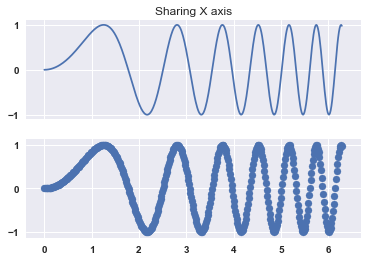

In [40]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(x, y)
axarr[0].set_title('Sharing X axis')
axarr[1].scatter(x, y)

In [17]:
d_set['PTAS%'] = d_set['PTS%'] + d_set['AST%']

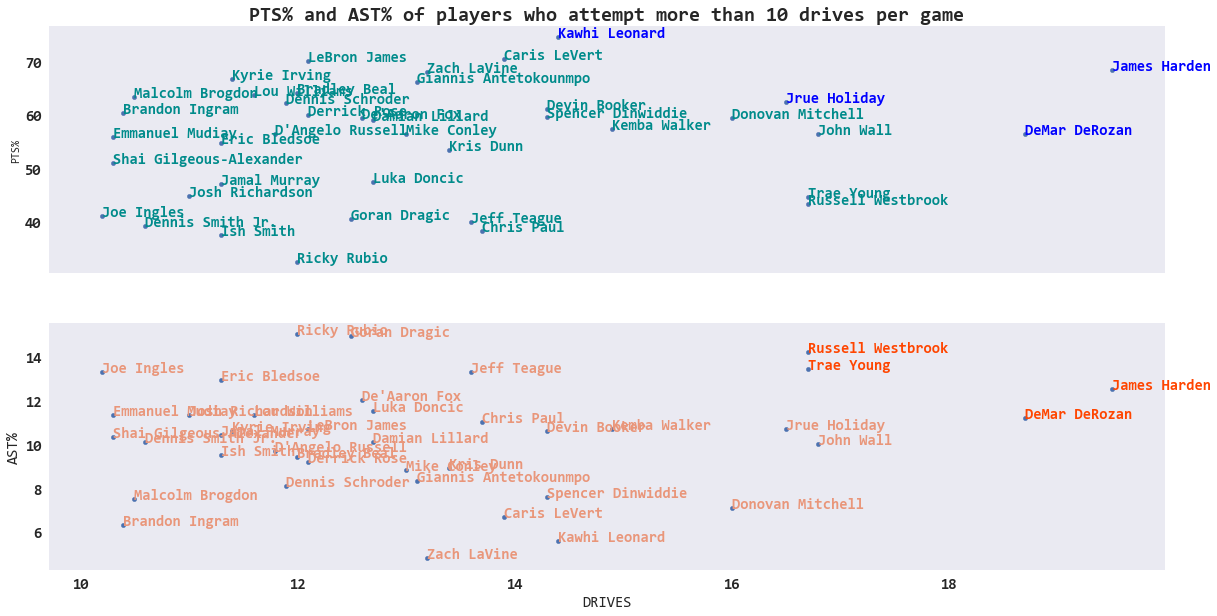

In [89]:
fig, ax = plt.subplots(2, sharex=True)
ax[0].set_title('PTS% and AST% of players who attempt more than 10 drives per game', fontsize=20, fontweight="bold")
d_set.plot.scatter('DRIVES', 'PTS%', figsize=(20, 10), fontsize=15, ax=ax[0])
for k, point in d_set.iterrows():
    if k in ["James Harden", "DeMar DeRozan", "Jrue Holiday", "Kawhi Leonard"]:
        ax[0].annotate(str(k), (point['DRIVES'], point['PTS%']), color='blue', fontsize=15, fontweight='bold')
    else:
        ax[0].annotate(str(k), (point['DRIVES'], point['PTS%']), color='darkcyan', fontsize=15, fontweight='bold')

plt.xlabel('DRIVES PER GAME', fontsize=15)
plt.ylabel('PTS%', fontsize=15)
ax[0].grid(False)

#fig2, ax2 = plt.subplots(1, 2, 2, sharex=ax1)
d_set.plot.scatter('DRIVES', 'AST%', figsize=(20, 10), fontsize=15, ax=ax[1])
for k, point in d_set.iterrows():
    if k in ["James Harden", "Russell Westbrook", "Trae Young", "DeMar DeRozan"]:
        ax[1].annotate(str(k), (point['DRIVES'], point['AST%']), color='orangered', fontsize=15, fontweight='bold')
    else:
        ax[1].annotate(str(k), (point['DRIVES'], point['AST%']), color='darksalmon', fontsize=15, fontweight='bold')
#plt.title('PTS% of players who attempt more than 3 drives per game', fontsize=20, fontweight="bold")
#plt.xlabel('DRIVES PER GAME', fontsize=15)
#plt.ylabel('PTS%', fontsize=15)

ax[1].grid(False)

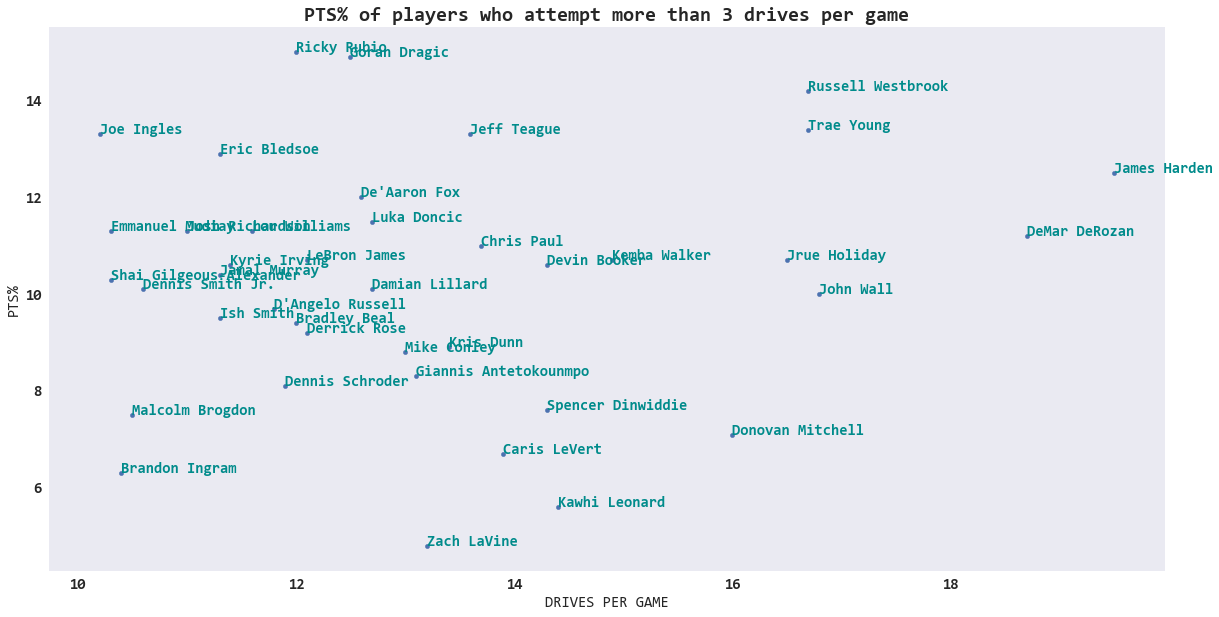

In [20]:
fig, ax = plt.subplots()
d_set.plot.scatter('DRIVES', 'AST%', figsize=(20, 10), fontsize=15, ax=ax)
for k, point in d_set.iterrows():
    #if k in ["Rudy Gobert", "Joel Embiid", "Clint Capela"]:
    #    ax.annotate(str(k), (point['DFGA'], point['DFG%']), color='red', fontsize=15, fontweight='bold')
    ax.annotate(str(k), (point['DRIVES'], point['AST%']), color='darkcyan', fontsize=15, fontweight='bold')
plt.title('PTS% of players who attempt more than 3 drives per game', fontsize=20, fontweight="bold")
plt.xlabel('DRIVES PER GAME', fontsize=15)
plt.ylabel('PTS%', fontsize=15)

ax.grid(False)

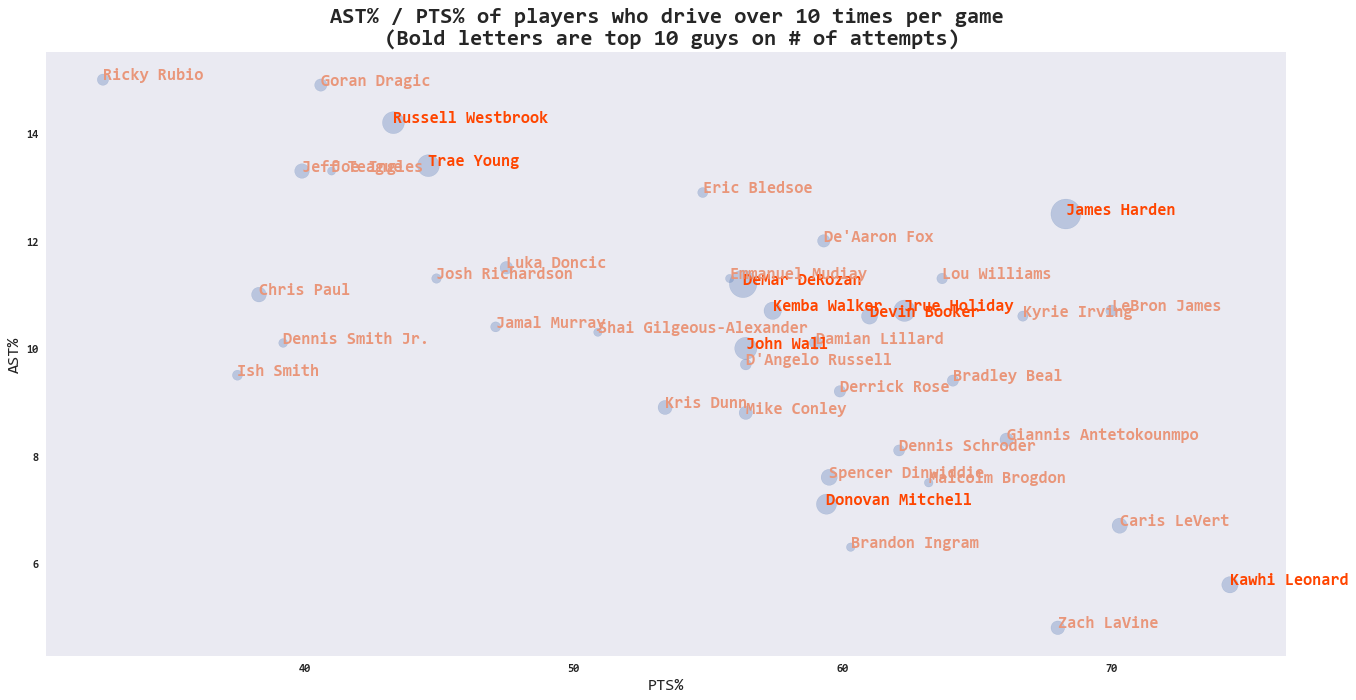

In [105]:
plt.figure(figsize=(20, 10), dpi=80)
plt.scatter(x=d_set['PTS%'], y=d_set['AST%'], s=d_set['DRIVES'].values ** 4 /200, alpha=0.3)
#d_set.plot.scatter(x='PTS%', y='AST%', s='DRIVES'.values, figsize=(20, 10), fontsize=15, ax=ax)
for k, point in d_set.iterrows():
    if k in ["James Harden", "Russell Westbrook", "DeMar DeRozan", "Jrue Holiday", "John Wall", "Trae Young", "Donovan Mitchell", "Kemba Walker", "Kawhi Leonard", "Devin Booker"]:
        plt.annotate(str(k), (point['PTS%'], point['AST%']), color='orangered', fontsize=15, fontweight='bold')
    else:
        plt.annotate(str(k), (point['PTS%'], point['AST%']), color='darksalmon', fontsize=15, fontweight='bold')
plt.title('AST% / PTS% of players who drive over 10 times per game\n (Bold letters are top 10 guys on # of attempts)', fontsize=20, fontweight="bold")
plt.xlabel('PTS%', fontsize=15)
plt.ylabel('AST%', fontsize=15)

plt.grid(False)

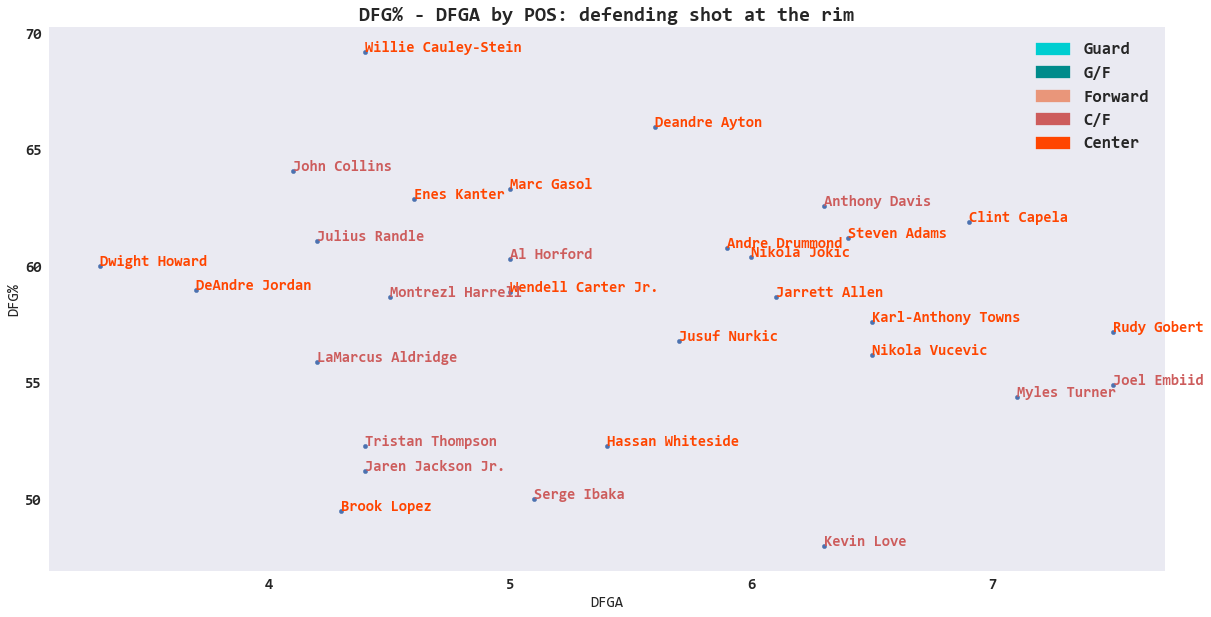

In [76]:
fig, ax = plt.subplots()
d_set.plot.scatter('DFGA', 'DFG%', figsize=(20, 10), fontsize=15, ax=ax)
for k, point in d_set.iterrows():
    #if k in ["Rudy Gobert", "Joel Embiid", "Clint Capela"]:
    #    ax.annotate(str(k), (point['DFGA'], point['DFG%']), color='red', fontsize=15, fontweight='bold')
        
    if point['POS'] == 'Guard':
        ax.annotate(str(k), (point['DFGA'], point['DFG%']), color='darkturquoise', fontsize=15, fontweight='bold')
    elif point['POS'] == 'G/F':
        ax.annotate(str(k), (point['DFGA'], point['DFG%']), color='darkcyan', fontsize=15, fontweight='bold')
    elif point['POS'] == 'Forward':
        ax.annotate(str(k), (point['DFGA'], point['DFG%']), color='darksalmon', fontsize=15, fontweight='bold')
    elif point['POS'] == 'C/F':
        ax.annotate(str(k), (point['DFGA'], point['DFG%']), color='indianred', fontsize=15, fontweight='bold')
    else:
        ax.annotate(str(k), (point['DFGA'], point['DFG%']), color='orangered', fontsize=15, fontweight='bold')
plt.title('DFG% - DFGA by POS: defending shot at the rim', fontsize=20, fontweight="bold")
plt.xlabel('DFGA', fontsize=15)
plt.ylabel('DFG%', fontsize=15)

g1_patch = mpatches.Patch(color='darkturquoise', label='Guard')
g2_patch = mpatches.Patch(color='darkcyan', label='G/F')
g3_patch = mpatches.Patch(color='darksalmon', label='Forward')
g4_patch = mpatches.Patch(color='indianred', label='C/F')
g5_patch = mpatches.Patch(color='orangered', label='Center')
plt.legend(handles=[g1_patch, g2_patch, g3_patch, g4_patch, g5_patch], fontsize=17)
ax.grid(False)